Here we explore the relationship between variables and identify multicollinearity issues. The pollution variables I've added to the bike hire dataset are highly likely to be a multicollinearity issue, so I will need to select which variables to keep for analysis and which to drop.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Use if working in colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Use if working in colab
# set working directory to project directory
%cd '/content/drive/My Drive/github/bicycles-seoul'

/content/drive/My Drive/github/bicycles-seoul


In [4]:
df = pd.read_csv('data/interim/02-data-after-EDA.csv')

In [5]:
# Check dypes before drawing up heatmap

df.dtypes

,0
Hour,int64
Temperature(C),float64
Humidity(%),int64
Wind speed (m/s),float64
Visibility (10m),int64
Dew point temperature(C),float64
Solar Radiation (MJ/m2),float64
Rainfall(mm),float64
Snowfall (cm),float64
Seasons,object


In [6]:
# Encode Seasons and Holiday to convert from object to int

df["Seasons"] = LabelEncoder().fit_transform(df["Seasons"])
df["Holiday"] = LabelEncoder().fit_transform(df["Holiday"])

<Axes: >

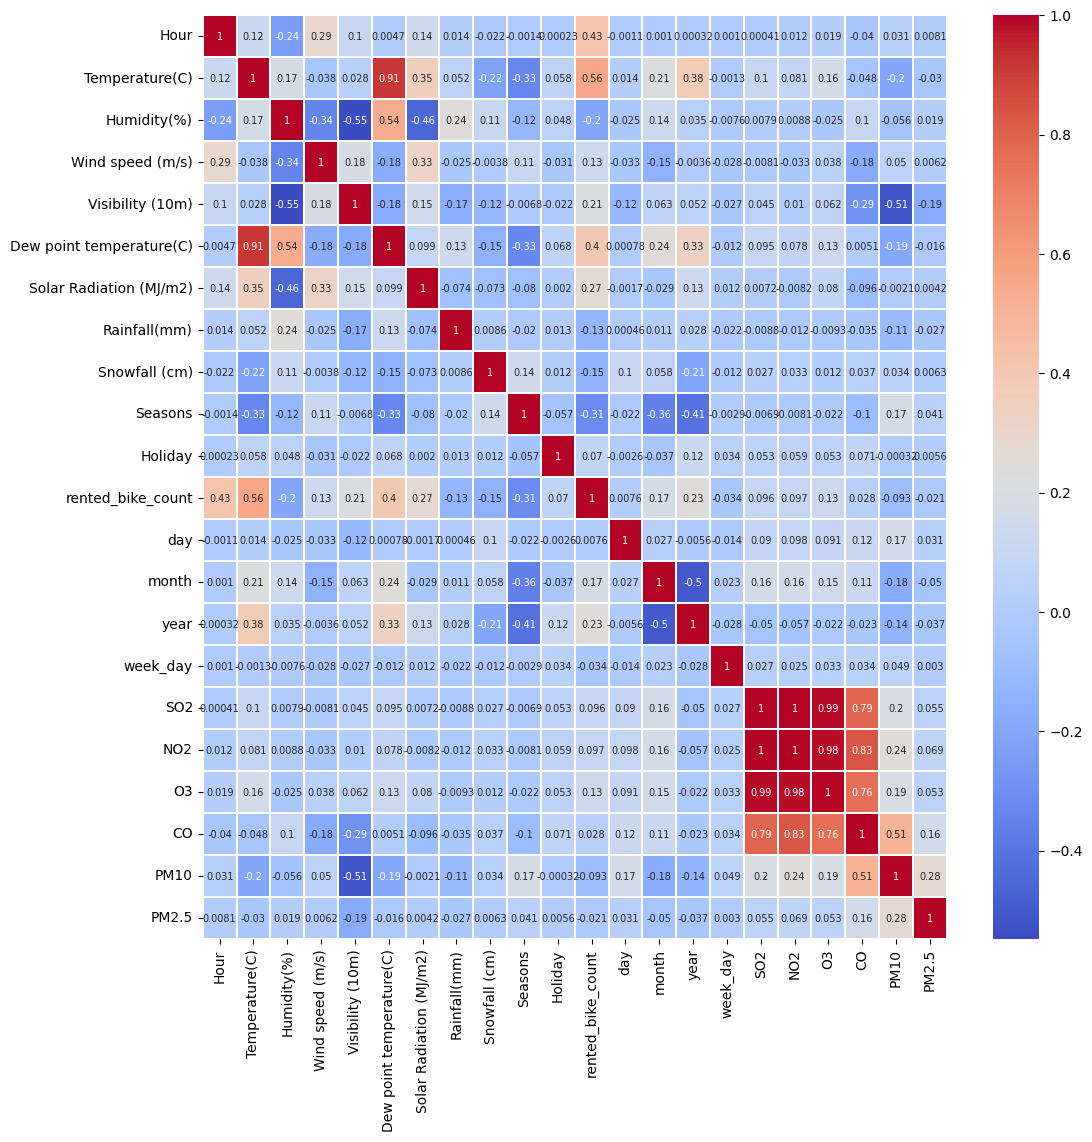

In [7]:
#Heatmap to explore correlation and identify multicollinearity issues

df_corr= df.corr()
plt.figure(figsize=(12,12))

sns.heatmap(df_corr, cmap='coolwarm', linewidths=0.1, annot=True, annot_kws={"size": 7}, linecolor='white')

Significant multicollinearity issues with the variables related to pollution. This isn't surprising - but it does mean I should make some choices about which pollution variables to use for analysis.

PM10 particles are larger, so might cause visible smog that puts off cyclists. PM2.5 particles are smaller, and any residents of Seoul paying attention to air quality might avoid days when PM2.5 particles are high. Both of these variables are not a multicollinearity issue, so I could keep both for analysis.

SO2, NO2, O3, and CO are all so closely related I need to select just one of them. I'm going to keep NO2, because it's related to respiratory issues, which seems relevant for cyclists.

Temperature and Dew Point Temperature are too closely related, so I'll drop Dew Point Temp.

In [8]:
# Drop the selected variables

df = df.drop(columns=['Dew point temperature(C)', 'SO2', 'O3', 'CO'])

<Axes: >

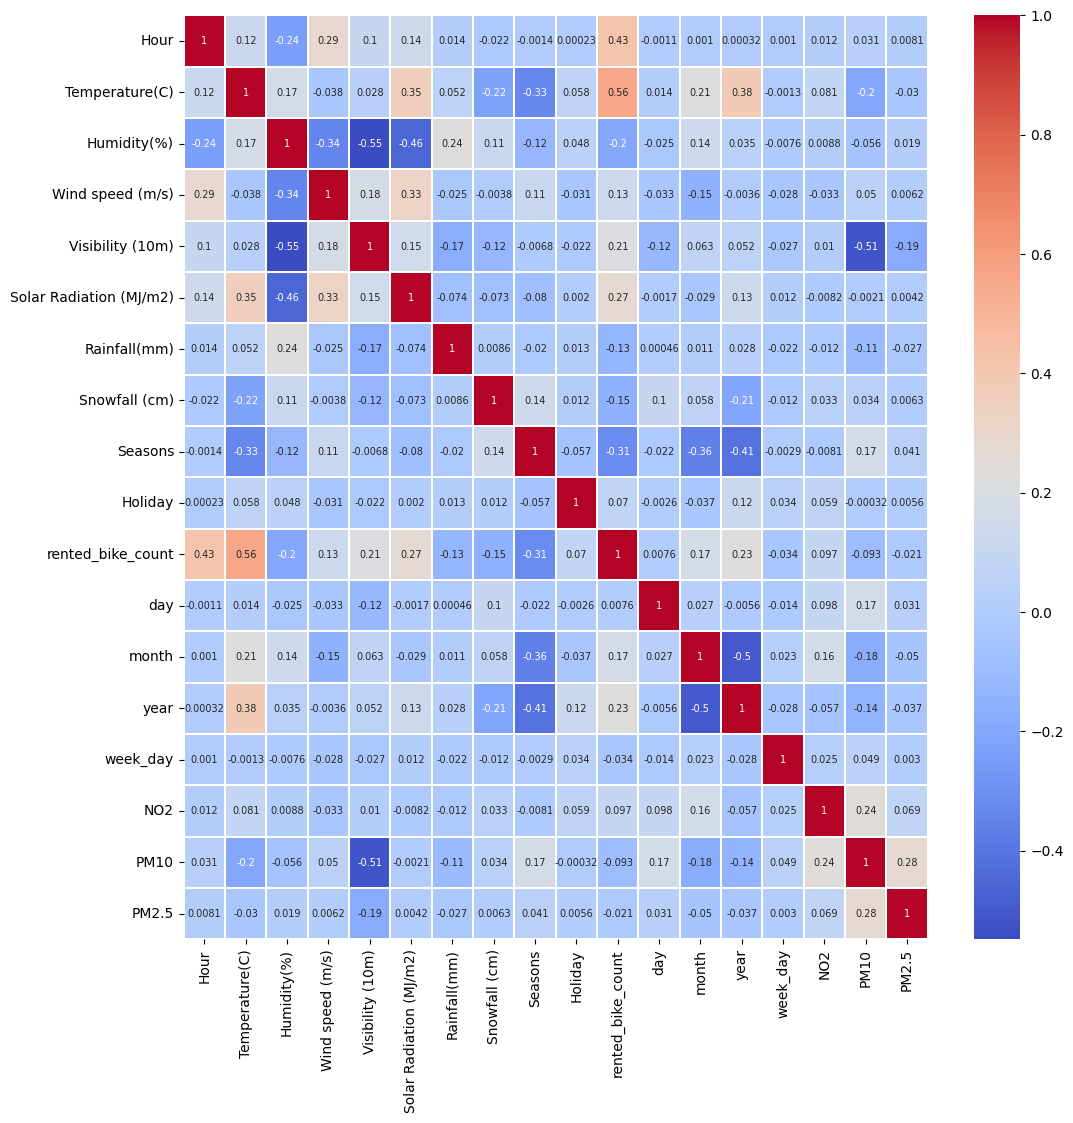

In [9]:
# Redraw the heatmap to check all multicollinearity issues have been resolved.

df_corr= df.corr()
plt.figure(figsize=(12,12))

sns.heatmap(df_corr, cmap='coolwarm', linewidths=0.1, annot=True, annot_kws={"size": 7}, linecolor='white')

In [10]:
# Save as csv in Drive
df.to_csv('data/processed/01-bicycles-pollution-data.csv', index=False)